# NetCDF4 and num2date 


In the following example we read in [atmospheric reanalysis data](http://icdc.cen.uni-hamburg.de/1/daten/reanalysis-atmosphere.html) in NetCDF4 format and plot the time series at some selected positions. We use the num2date module to efficiently decode the datetime from the meta-information. 

num2date(...) returns datetime objects given numeric time values. The function uses [CF Conventions and Metadata](http://cfconventions.org/)

In [2]:
import os.path
if not(os.path.exists('air.mon.mean.nc')): # Download data if not available
    !wget ftp://ftp.cdc.noaa.gov/Datasets/ncep.reanalysis.derived/surface/air.mon.mean.nc

--2017-12-13 21:29:17--  ftp://ftp.cdc.noaa.gov/Datasets/ncep.reanalysis.derived/surface/air.mon.mean.nc
           => ‘air.mon.mean.nc’
Resolving ftp.cdc.noaa.gov (ftp.cdc.noaa.gov)... 140.172.38.117
Connecting to ftp.cdc.noaa.gov (ftp.cdc.noaa.gov)|140.172.38.117|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /Datasets/ncep.reanalysis.derived/surface ... done.
==> SIZE air.mon.mean.nc ... 26463140
==> PASV ... done.    ==> RETR air.mon.mean.nc ... done.
Length: 26463140 (25M) (unauthoritative)

air.mon.mean.nc     100%[===================>]  25.24M   522KB/s    in 94s     

2017-12-13 21:30:55 (276 KB/s) - ‘air.mon.mean.nc’ saved [26463140]



In [3]:
%pylab inline
%config InlineBackend.figure_format = 'svg'
import pandas as pd
from netCDF4 import Dataset, num2date
import scipy.stats as stats

fn='/data/icdc/reanalyses/ncep_reanalysis1/DATA/2m_airtemp_monthly/air2m.mon.mean.nc'

fn='air.mon.mean.nc' # local copy on my laptop

f = Dataset(fn)
print(f.description)
print(f.References)
air = f.variables['air'][:]-273.15
time = f.variables['time']
lon = f.variables['lon'][:]
lat = f.variables['lat'][:]
date=pd.to_datetime(num2date(time[:], time.units)) # Convert to Pandas time object

Populating the interactive namespace from numpy and matplotlib
Data from NCEP initialized reanalysis (4x/day).  These are the 0.9950 sigma level values
http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanalysis.derived.html


Text(0,0.5,'Temperature [$^\\circ$C]')

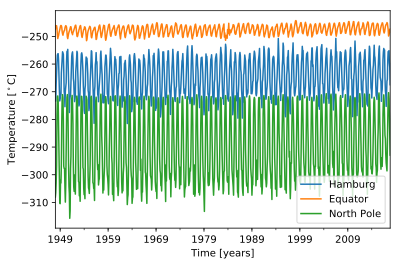

In [4]:
D={'Hamburg':(10.0,53.3),'Equator':(0.0,0.0),'North Pole':(0,90.0)} # Define locations
DF=pd.DataFrame() # Create empty DataFrame table

for k in D.keys():
    lon0,lat0=D[k]
    ilon,ilat=argmin(abs(lon-lon0)),argmin(abs(lat-lat0)) # index for location
    # Generate Pandas Series Object and store in DataFrame
    DF[k]=pd.Series(air[:,ilat,ilon],index=date)

DF.plot()
xlabel('Time [years]')
ylabel('Temperature [$^\circ$C]')

## Calculate seasonal cycles with Pandas groupby function



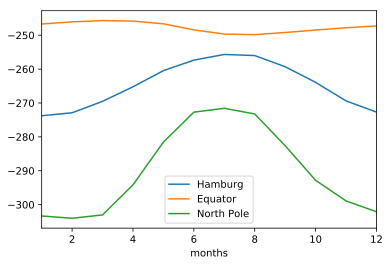

In [5]:
periods = date.to_period(freq='M')
DF['months']=periods.month
DF_seasonal=DF.groupby('months').mean()
DF_seasonal.plot()